In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ts_data = pd.read_csv('../Maverik_Capstone/data/time_series_data_msba.csv')
ts_data = ts_data.drop(ts_data.columns[0], axis=1)
ts_data = ts_data.rename(columns={'daily_yoy_ndt.total_inside_sales':'inside_sales',
                                  'daily_yoy_ndt.total_food_service':'food_service'})

qual_data = pd.read_csv('../Maverik_Capstone/data/qualitative_data_msba.csv')
qual_data = qual_data.drop(qual_data.columns[0], axis=1)

info_cols = ['capital_projects.soft_opening_date',
             'calendar.calendar_day_date',
             'calendar.fiscal_week_id_for_year',
             'calendar.day_of_week',
             'calendar_information.holiday',
             'calendar_information.type_of_day',
             'site_id_msba']

ts_data_melt = ts_data.melt(info_cols,
                            var_name='Sales Type',
                            value_name='Amount')

ts_data_melt

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,site_id_msba,Sales Type,Amount
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,24535,inside_sales,2168.2920
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,24535,inside_sales,2051.5635
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,24535,inside_sales,2257.5000
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,24535,inside_sales,1520.5925
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,24535,inside_sales,1897.6930
...,...,...,...,...,...,...,...,...,...
55627,2021-01-12,2021-12-28,52,Tuesday,NONE,WEEKDAY,21560,unleaded,2492.5180
55628,2021-01-12,2022-01-01,1,Saturday,New Year's Day,WEEKEND,21560,unleaded,1564.0170
55629,2021-01-12,2022-01-04,1,Tuesday,NONE,WEEKDAY,21560,unleaded,2767.5970
55630,2021-01-12,2022-01-07,2,Friday,NONE,WEEKDAY,21560,unleaded,2868.2325


In [3]:
# qual_data[(qual_data['rv_lanes_fueling_positions_2'] == 0) & (qual_data['hi_flow_lanes_fueling_positions'] > 0)]
no_truck_sites = qual_data.loc[qual_data['rv_lanes_fueling_positions_2'] == 0, 'site_id_msba'].unique()
merged_data = pd.merge(ts_data, qual_data, on='site_id_msba')
merged_data.to_csv('../Maverik_Capstone/data/merged_data.csv')

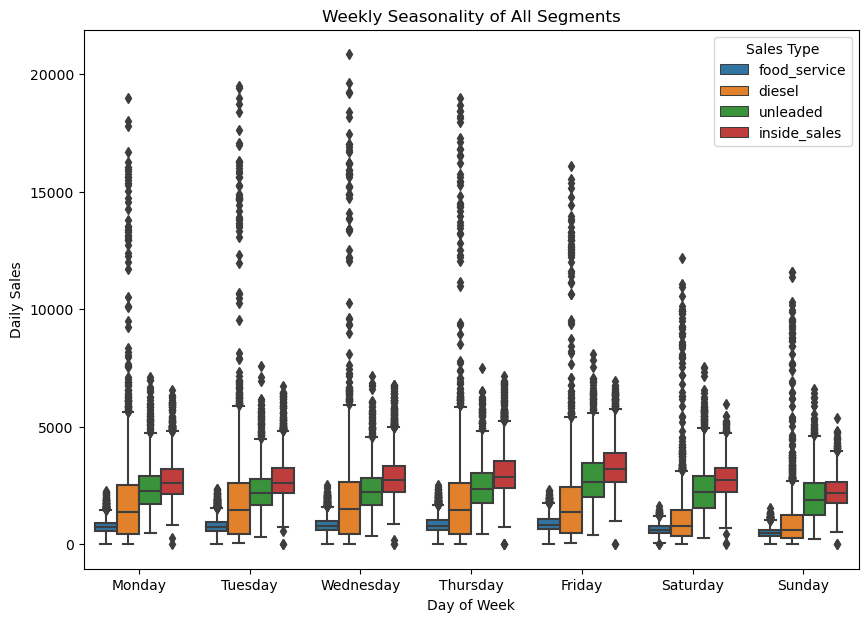

In [4]:
fig = plt.figure(figsize = (10,7))

day_is = sns.boxplot(y='Amount', 
                  x = 'calendar.day_of_week', 
                  data=ts_data_melt, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                  hue='Sales Type',
                  hue_order=['food_service', 'diesel', 'unleaded', 'inside_sales'])
day_is.set_title('Weekly Seasonality of All Segments')
day_is.set_xlabel('Day of Week')
day_is.set_ylabel('Daily Sales')

plt.show()

The first aspect of seasonality to examine at the daily grain level is weekly seasonality.  We began by plotting all sales in each segment by the day of the week.  It is evident that each segment displays some seasonality, as well as has a significant level of outlying data points which will need to be better understood so that decisions in the modelling phase can take this into account.

Next, each segment was plotted individually to examine any differences between segments.

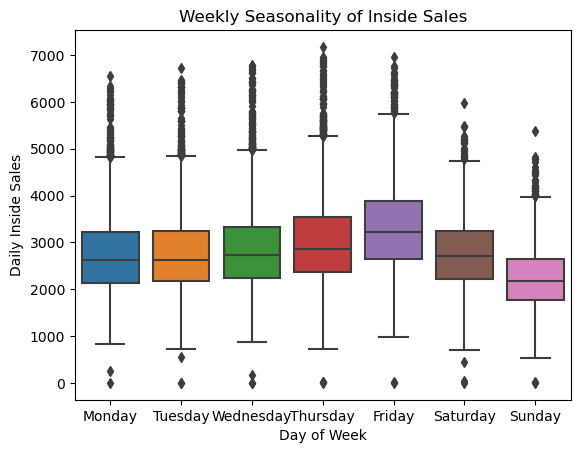

In [5]:
day_is = sns.boxplot(y='inside_sales', 
                  x = 'calendar.day_of_week', 
                  data=ts_data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_is.set_title('Weekly Seasonality of Inside Sales')
day_is.set_xlabel('Day of Week')
day_is.set_ylabel('Daily Inside Sales')

plt.show()

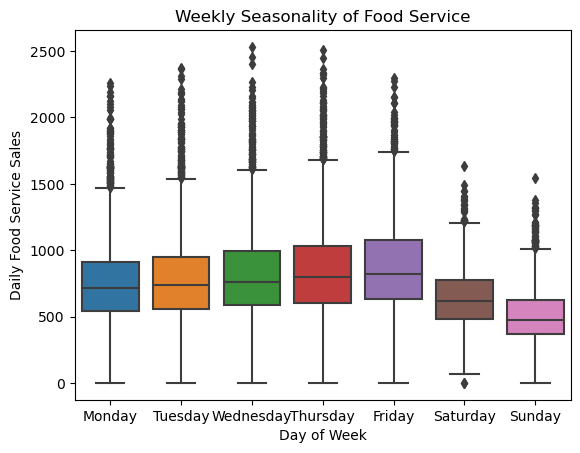

In [6]:
day_fs = sns.boxplot(y='food_service', 
                  x = 'calendar.day_of_week', 
                  data=ts_data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_fs.set_title('Weekly Seasonality of Food Service')
day_fs.set_xlabel('Day of Week')
day_fs.set_ylabel('Daily Food Service Sales')

plt.show()

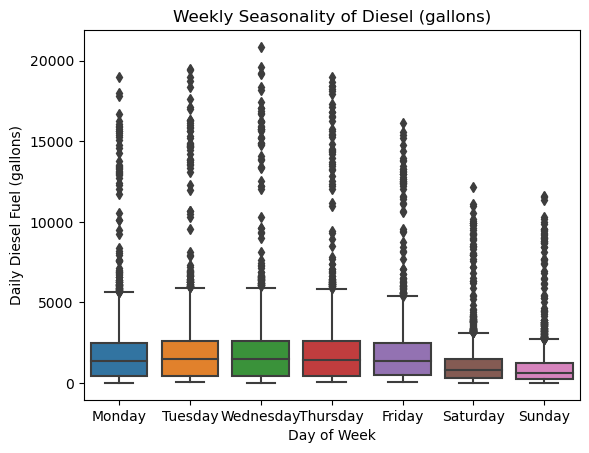

In [7]:
day_d = sns.boxplot(y='diesel', 
                  x = 'calendar.day_of_week', 
                  data=ts_data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_d.set_title('Weekly Seasonality of Diesel (gallons)')
day_d.set_xlabel('Day of Week')
day_d.set_ylabel('Daily Diesel Fuel (gallons)')

plt.show()

It became obvious that Diesel sales exhibit a high degree of variation in sales volume, so further investigation was carried out to determine root causes of this variation.  
First, it was examined what role the number of Hi-Flow fueling positions (these are able to dispense a large amount of diesel quickly, and aren't typically used by passenger vehicles) has on Diesel sales volume.

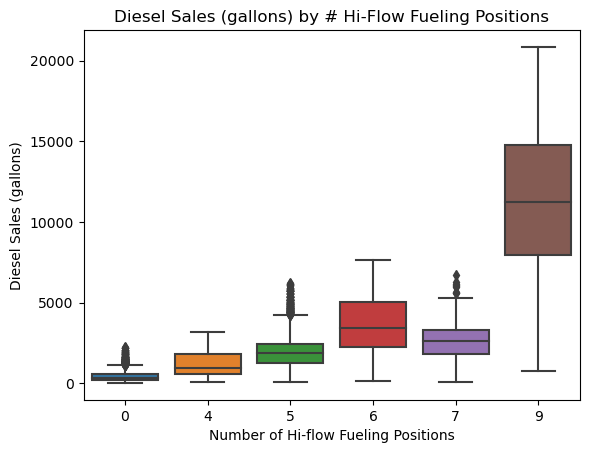

In [8]:
d_pos = sns.boxplot(data=merged_data, 
                        x=merged_data['hi_flow_lanes_fueling_positions_2'],
                        y='diesel_x'
                       )
d_pos.set_title('Diesel Sales (gallons) by # Hi-Flow Fueling Positions')
d_pos.set_ylabel('Diesel Sales (gallons)')
d_pos.set_xlabel('Number of Hi-flow Fueling Positions')
plt.show()

Evident from this chart, much of the variation is due to sites with 9 Hi-Flow fueling positions.  
  
Further examination, showed a slightly modified seasonalilty with Diesel sales volumes building to mid-week and then decreasing through the weekend.  It also was noted that only a single site in the dataset met these criteria.  This fact will be important to take account of during modelling.

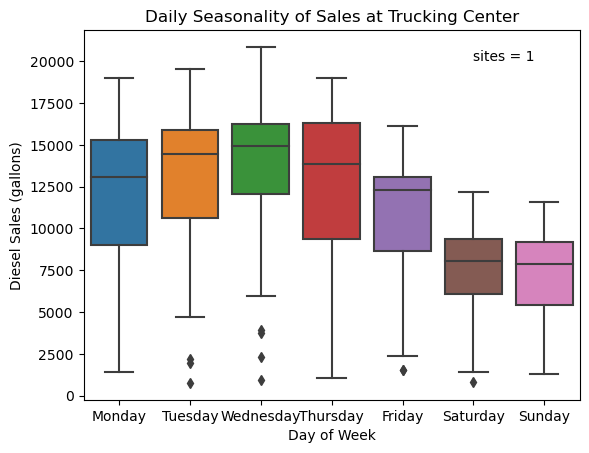

In [9]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] > 8, ['site_id_msba','diesel_x', 'calendar.day_of_week']]

d_tc = sns.boxplot(data=tc_diesel, 
                        x='calendar.day_of_week',
                        y='diesel_x',
                        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                       )
d_tc.set_title('Daily Seasonality of Sales at Trucking Center')
d_tc.set_ylabel('Diesel Sales (gallons)')
d_tc.set_xlabel('Day of Week')
d_tc.text(5, 20000, ('sites = ' + str(len(tc_diesel['site_id_msba'].unique()))))

plt.show()

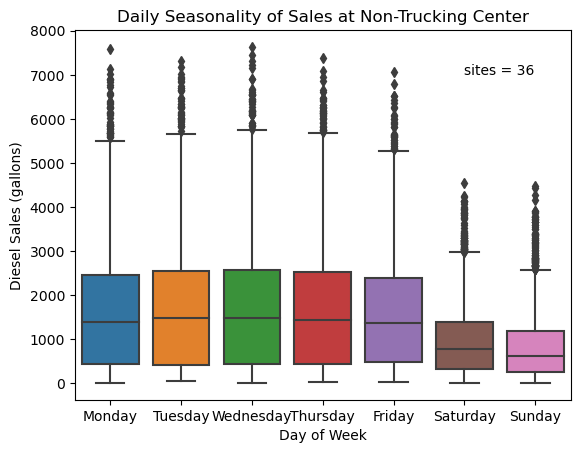

In [10]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] < 8, ['site_id_msba','diesel_x', 'calendar.day_of_week']]

d_tc = sns.boxplot(data=tc_diesel, 
                        x='calendar.day_of_week',
                        y='diesel_x',
                        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                       )
d_tc.set_title('Daily Seasonality of Sales at Non-Trucking Center')
d_tc.set_ylabel('Diesel Sales (gallons)')
d_tc.set_xlabel('Day of Week')
d_tc.text(5, 7000, ('sites = ' + str(len(tc_diesel['site_id_msba'].unique()))))

plt.show()

When the Non-Trucking Center sites were examined, they displayed very consistent volume during the week, and the characteristic drop off on Saturday and Sunday sales volumes.

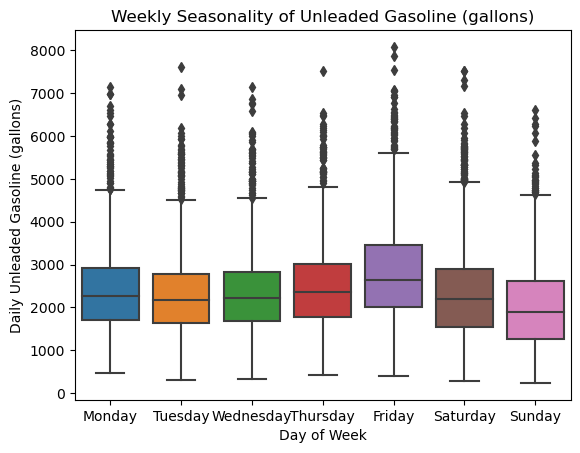

In [11]:
day_u = sns.boxplot(y='unleaded', 
                  x = 'calendar.day_of_week', 
                  data=ts_data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_u.set_title('Weekly Seasonality of Unleaded Gasoline (gallons)')
day_u.set_xlabel('Day of Week')
day_u.set_ylabel('Daily Unleaded Gasoline (gallons)')

plt.show()

Unleaded sales show a trend of increasing at the end of the week (Thursday & Friday), and while they decrease on the weekend, not to the same degree as Diesel sales or Food Service.  The seasonality pattern is more similar to that of Inside Sales.

Following the examination of weekday seasonality, it was determined to examine seasonality over the course of the fiscal year, by fiscal week.  The data was still at the daily grain, but grouped by fiscal week.  

First, Inside Sales showed an annual trend of growth through the late spring and summer and gradual decrease into the winter months.

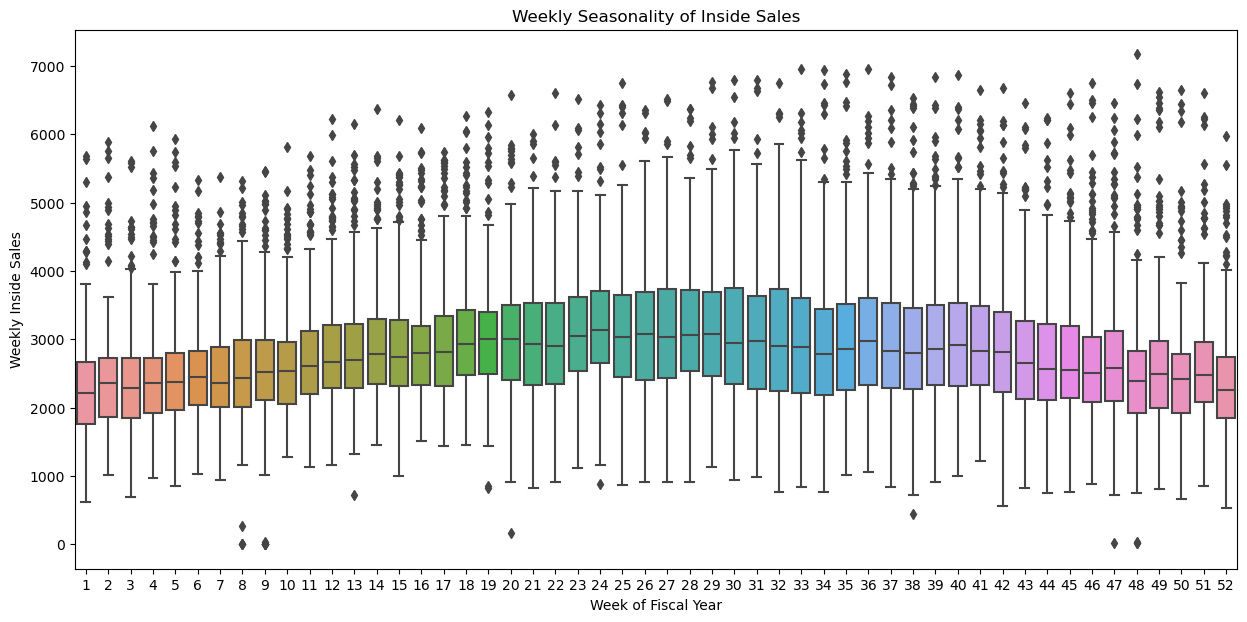

In [12]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='inside_sales', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Inside Sales')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Inside Sales')

plt.show()

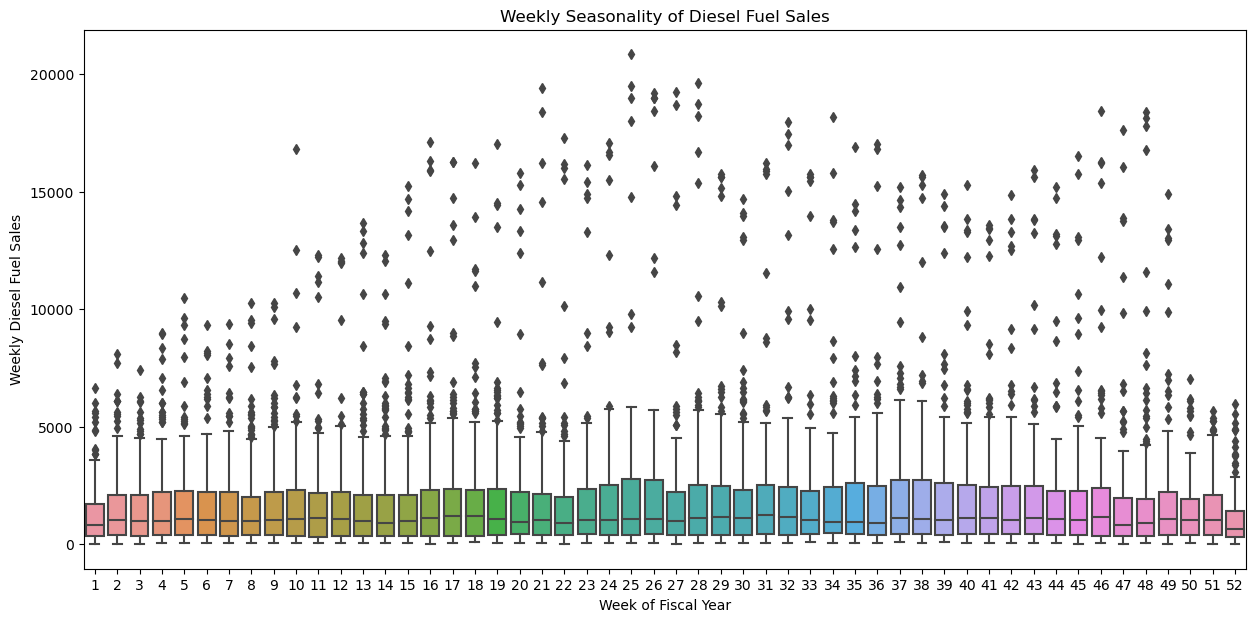

In [13]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

Diesel sales were examined and again displayed a consistent sales volume with significant outliers.  Like daily sales by weekday, Diesel sales were divided into Trucking Center vs Non-Trucking Center and compared.

1 stores


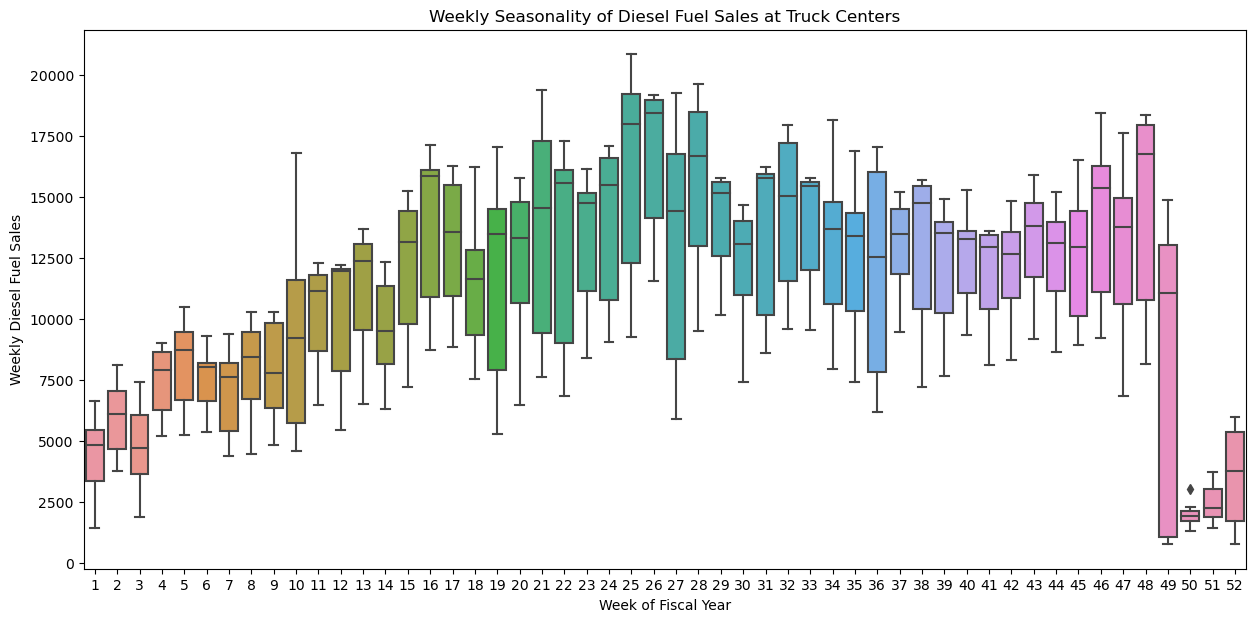

In [14]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] > 8, ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]
print(len(tc_diesel['site_id_msba'].unique()), 'stores')

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at Truck Centers')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

Trucking Center Diesel Sales showed an interesting trend of building through the first half of the year, staying relatively consistent until the winter holiday season, at which time they drop to significantly lower levels.

21 stores


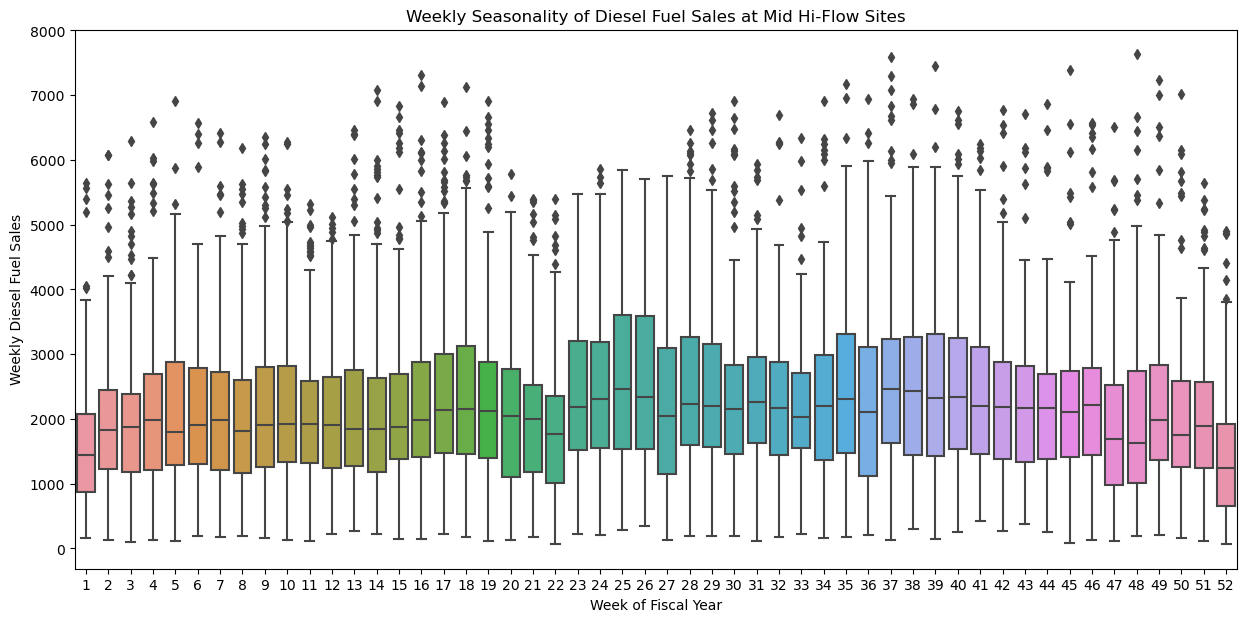

In [15]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'].between(1,7), ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]
print(len(tc_diesel['site_id_msba'].unique()), 'stores')

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at Mid Hi-Flow Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

In this case, it became valuable to examine Diesel Sales in terms of sites with Hi-Flow positions < 9, but > 0 in addition to those that have no H-Flow fueling positions.  The former, displayed above showed consistent sales levels throughout the year, slightly elevated during the summer.  

Sites with no Hi-Flow positions were plotted seperately, and display a similar seasonality, but at a significantly lower level.  A interesting cluster of outliers was noted from weeks 8-14 that should be further explored, possibly in relation to holidays.

15 stores


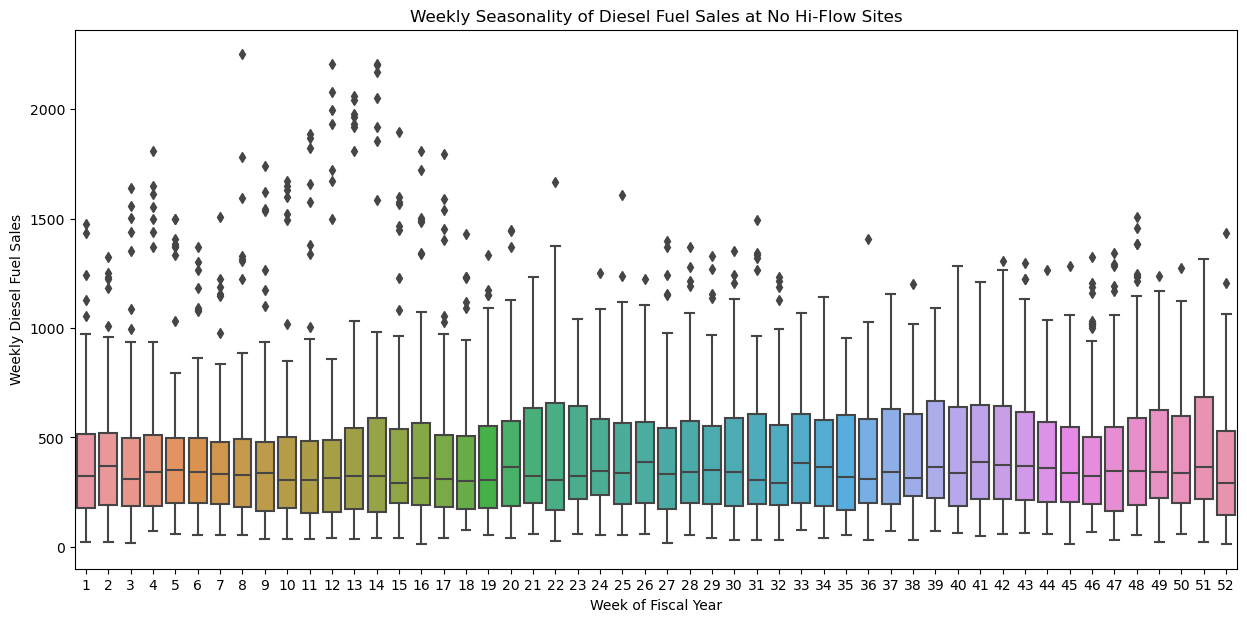

In [16]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] == 0, ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]
print(len(tc_diesel['site_id_msba'].unique()), 'stores')

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at No Hi-Flow Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

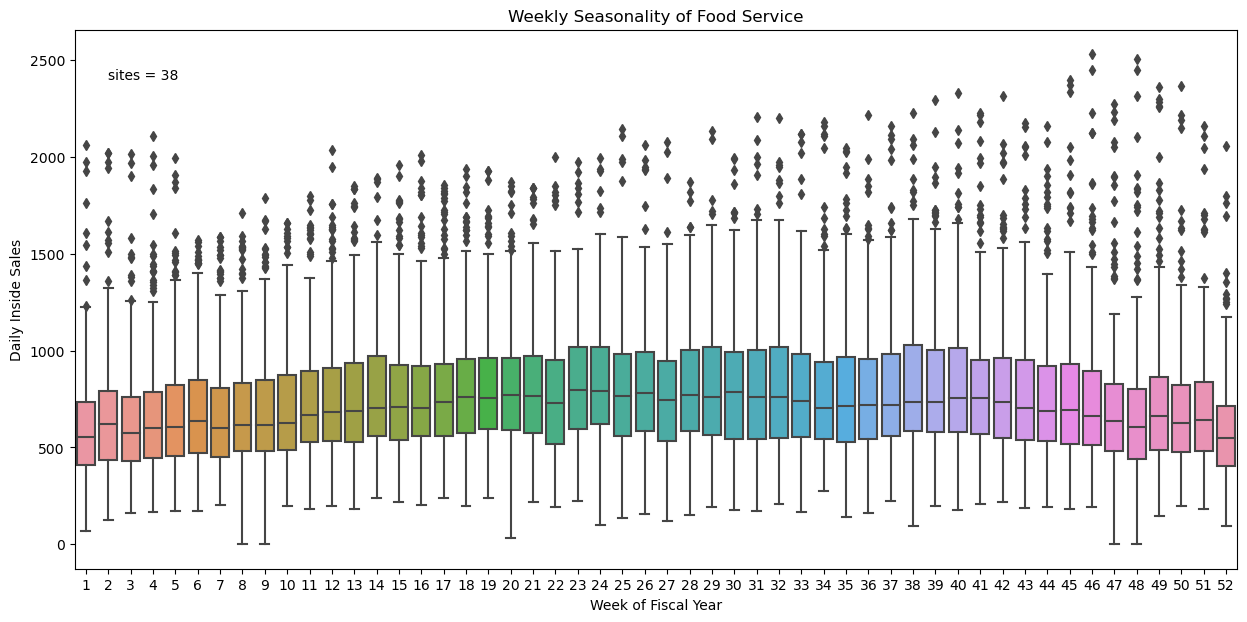

In [17]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='food_service', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Food Service')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Daily Inside Sales')
week_is.text(1, 2400, ('sites = ' + str(len(ts_data['site_id_msba'].unique()))))

plt.show()

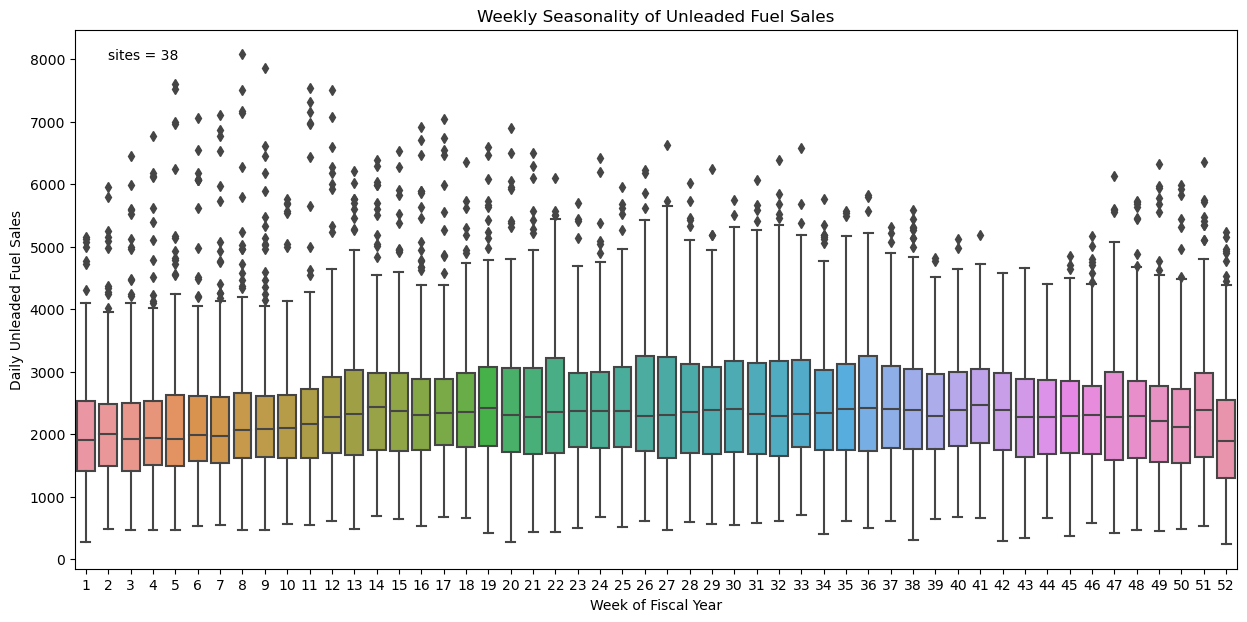

In [18]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Daily Unleaded Fuel Sales')
week_is.text(1, 8000, ('sites = ' + str(len(ts_data['site_id_msba'].unique()))))

plt.show()

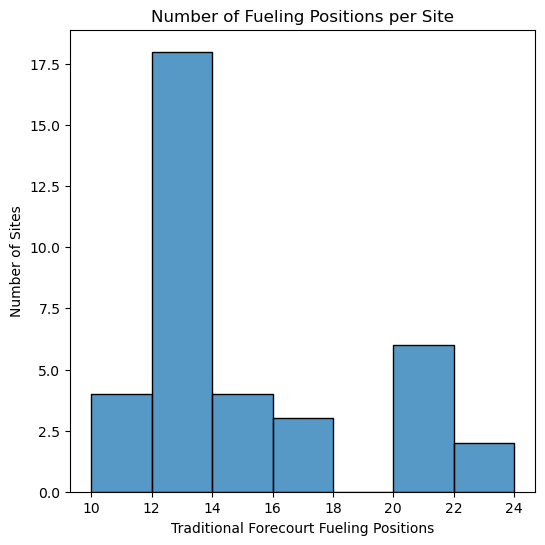

In [19]:
u_pos_count = qual_data[['site_id_msba', 'traditional_forecourt_fueling_positions']]

fig = plt.figure(figsize = (6,6))
fuel_pos = sns.histplot(data=u_pos_count,
                        x = 'traditional_forecourt_fueling_positions')
fuel_pos.set_title('Number of Fueling Positions per Site')
fuel_pos.set_xlabel('Traditional Forecourt Fueling Positions')
fuel_pos.set_ylabel('Number of Sites')

plt.show()

In [20]:
merged_data.columns

Index(['capital_projects.soft_opening_date', 'calendar.calendar_day_date',
       'calendar.fiscal_week_id_for_year', 'calendar.day_of_week',
       'calendar_information.holiday', 'calendar_information.type_of_day',
       'inside_sales', 'food_service', 'diesel_x', 'unleaded', 'site_id_msba',
       'open_year', 'square_feet', 'front_door_count',
       'years_since_last_project', 'parking_spaces', 'lottery', 'freal',
       'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza',
       'ethanol_free', 'diesel_y', 'hi_flow_lanes', 'rv_lanes',
       'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash', 'ev_charging',
       'rv_dumps', 'propane', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
       'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
       'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc',
       'traditional_forecourt_fueling_positions',
       'traditional_forecourt_layout', 'traditional_forecourt_stack_type',
       'rv_lanes

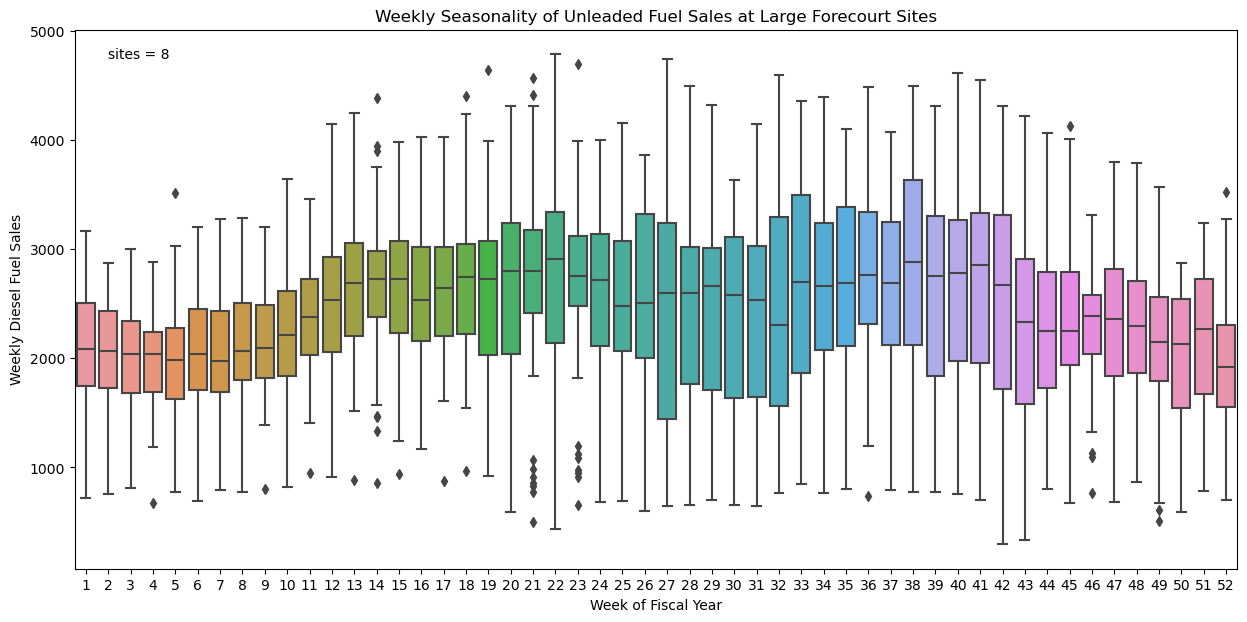

In [21]:
tc_unleaded = merged_data.loc[merged_data['traditional_forecourt_fueling_positions'] > 19, ['unleaded', 'calendar.fiscal_week_id_for_year','site_id_msba']]

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_unleaded)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales at Large Forecourt Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')
week_is.text(1, 4750, ('sites = ' + str(len(tc_unleaded['site_id_msba'].unique()))))

plt.show()

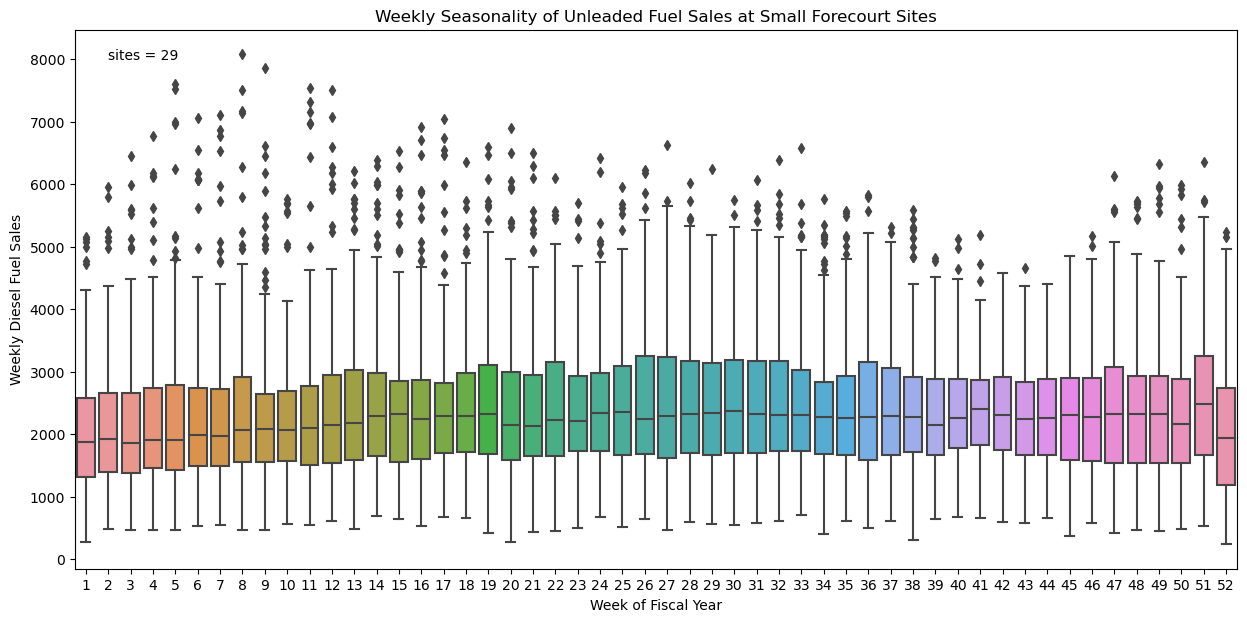

In [22]:
tc_unleaded = merged_data.loc[merged_data['traditional_forecourt_fueling_positions'] < 19, ['unleaded', 'calendar.fiscal_week_id_for_year','site_id_msba']]

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_unleaded)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales at Small Forecourt Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')
week_is.text(1, 8000, ('sites = ' + str(len(tc_unleaded['site_id_msba'].unique()))))

plt.show()

C:\Users\pengo\AppData\Local\Temp\ipykernel_29436\1713509549.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,0].get_xticks()/1000])
C:\Users\pengo\AppData\Local\Temp\ipykernel_29436\1713509549.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,1].get_xticks()/1000])
C:\Users\pengo\AppData\Local\Temp\ipykernel_29436\1713509549.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,2].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,2].get_xticks()/1000])
C:\Users\pengo\AppData\Local\Temp\ipykernel_29436\1713509549.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,3].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,3].get_xticks()/1000])


Text(0.5, 0, '')

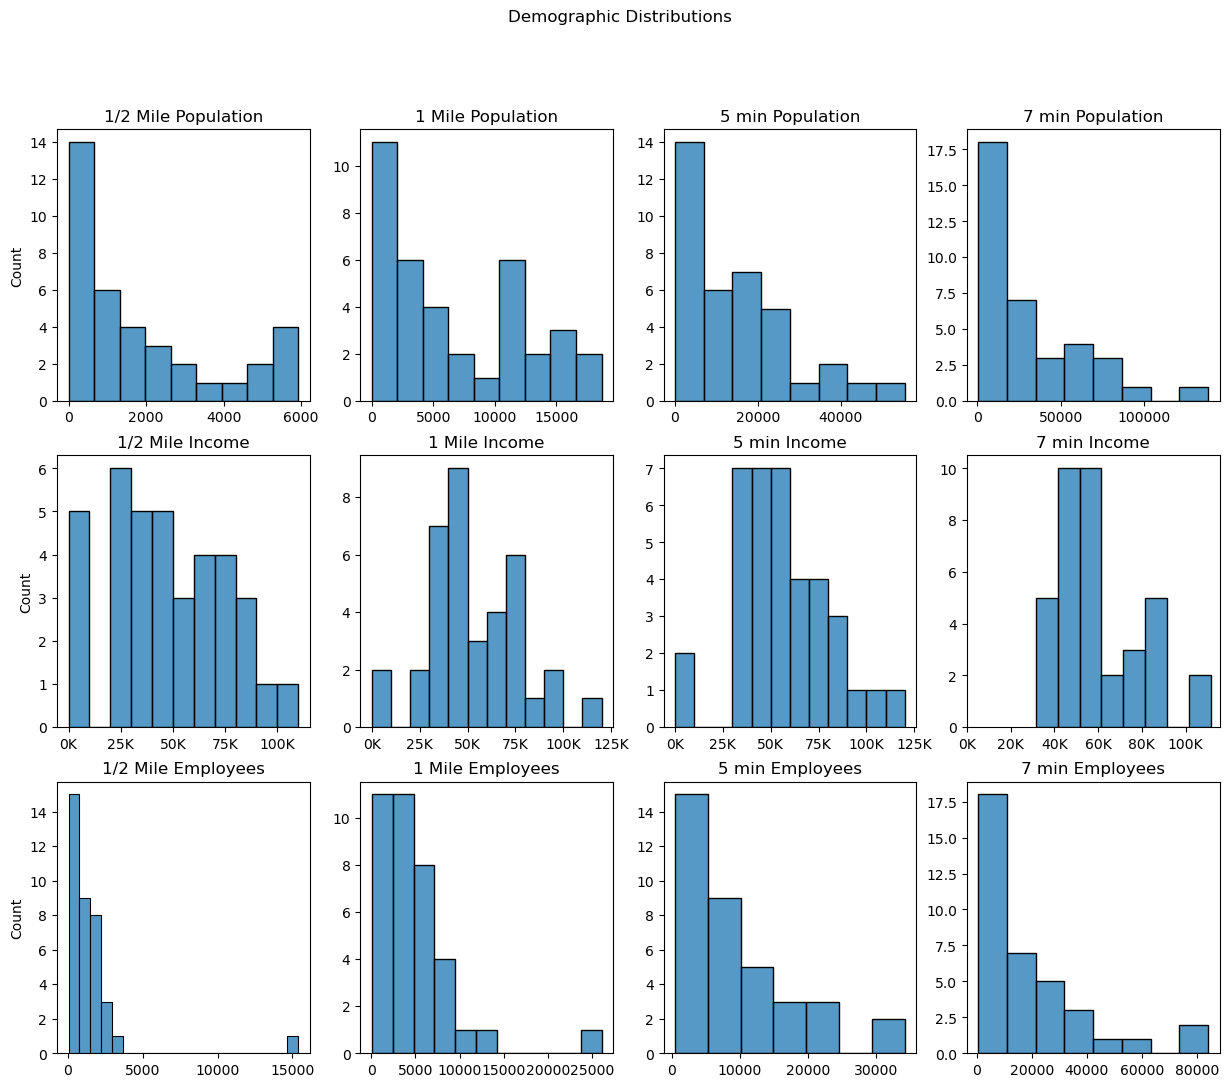

In [23]:
pop = qual_data[['site_id_msba', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
                 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
                 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc']]

fig, axes = plt.subplots(3, 4, figsize =(15,12))
fig.suptitle('Demographic Distributions')

#1/2 Mile Pop
sns.histplot(ax = axes[0,0], x=pop.x1_2_mile_pop, bins=9)
axes[0,0].set_title('1/2 Mile Population')
axes[0,0].set_xlabel('')
# 1 Mile Pop
sns.histplot(ax = axes[0,1], x=pop.x1_mile_pop, bins=9)
axes[0,1].set_title('1 Mile Population')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
# 5 min Pop
sns.histplot(ax = axes[0,2], x=pop.x5_min_pop, bins=8)
axes[0,2].set_title('5 min Population')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('')
# 7 min Pop
sns.histplot(ax = axes[0,3], x=pop.x7_min_pop, bins=8)
axes[0,3].set_title('7 min Population')
axes[0,3].set_ylabel('')
axes[0,3].set_xlabel('')

#1/2 Mile Income
sns.histplot(ax = axes[1,0], x=pop.x1_2_mile_income, binwidth = 10000)
axes[1,0].set_title('1/2 Mile Income')
axes[1,0].set_xlabel('')
axes[1,0].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,0].get_xticks()/1000])
# 1 Mile Income
sns.histplot(ax = axes[1,1], x=pop.x1_mile_income, binwidth = 10000)
axes[1,1].set_title('1 Mile Income')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,1].get_xticks()/1000])
# 5 min Income
sns.histplot(ax = axes[1,2], x=pop.x5_min_inc, binwidth = 10000)
axes[1,2].set_title('5 min Income')
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('')
axes[1,2].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,2].get_xticks()/1000])
# 7 min Income
sns.histplot(ax = axes[1,3], x=pop.x7_min_inc, binwidth = 10000)
axes[1,3].set(xlim=(0,None))
axes[1,3].set_title('7 min Income')
axes[1,3].set_ylabel('')
axes[1,3].set_xlabel('')
axes[1,3].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,3].get_xticks()/1000])


#1/2 Mile Employees
sns.histplot(ax = axes[2,0], x=pop.x1_2_mile_emp)
axes[2,0].set_title('1/2 Mile Employees')
axes[2,0].set_xlabel('')
# 1 Mile Employees
sns.histplot(ax = axes[2,1], x=pop.x1_mile_emp)
axes[2,1].set_title('1 Mile Employees')
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('')
# 5 min Employees
sns.histplot(ax = axes[2,2], x=pop.x5_min_emp)
axes[2,2].set_title('5 min Employees')
axes[2,2].set_ylabel('')
axes[2,2].set_xlabel('')
# 7 min Employees
sns.histplot(ax = axes[2,3], x=pop.x7_min_emp)
axes[2,3].set_title('7 min Employees')
axes[2,3].set_ylabel('')
axes[2,3].set_xlabel('')

In [24]:
ts_data[['unleaded','diesel','inside_sales', 'food_service']].describe()

,unleaded,diesel,inside_sales,food_service
count,13908.000000,13908.000000,13908.000000,13908.000000
mean,2382.091588,1702.585227,2846.537988,759.922326
std,1025.518658,2161.208192,981.299870,341.578220
min,240.180500,0.000000,0.000000,0.000000
25%,1654.149000,383.062750,2181.156250,521.087875
50%,2256.677500,1018.920000,2693.976250,697.434500
75%,2928.254000,2283.297625,3325.306250,924.282625
max,8077.233500,20853.952000,7172.466000,2531.662000


In [25]:
ts_data_melt_s = ts_data_melt[['site_id_msba','calendar.fiscal_week_id_for_year', 'Sales Type', 'Amount']]
ts_data_melt_s.columns.values[:] =['site_id', 'fiscal_week','sales_type','daily_total' ]
ts_data_melt_s['fiscal_week_sales_type'] = ts_data_melt_s['sales_type'] + '_' + ts_data_melt_s['fiscal_week'].astype(str)
ts_data_melt_s = ts_data_melt_s.groupby(['site_id','fiscal_week_sales_type']).agg({'daily_total':'sum'})

clus_data = ts_data_melt_s.unstack('fiscal_week_sales_type')
clus_data.columns = clus_data.columns.get_level_values(1)
clus_data.reset_index(inplace=True)
clus_data.columns.name = ''


C:\Users\pengo\AppData\Local\Temp\ipykernel_29436\2182490711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_melt_s['fiscal_week_sales_type'] = ts_data_melt_s['sales_type'] + '_' + ts_data_melt_s['fiscal_week'].astype(str)


In [26]:
clus_data.columns[1:]

Index(['diesel_1', 'diesel_10', 'diesel_11', 'diesel_12', 'diesel_13',
       'diesel_14', 'diesel_15', 'diesel_16', 'diesel_17', 'diesel_18',
       ...
       'unleaded_48', 'unleaded_49', 'unleaded_5', 'unleaded_50',
       'unleaded_51', 'unleaded_52', 'unleaded_6', 'unleaded_7', 'unleaded_8',
       'unleaded_9'],
      dtype='object', name='', length=208)

C:\Users\pengo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pengo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pengo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pengo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

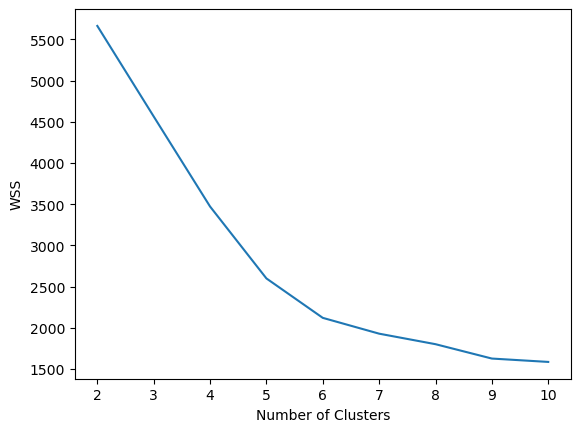

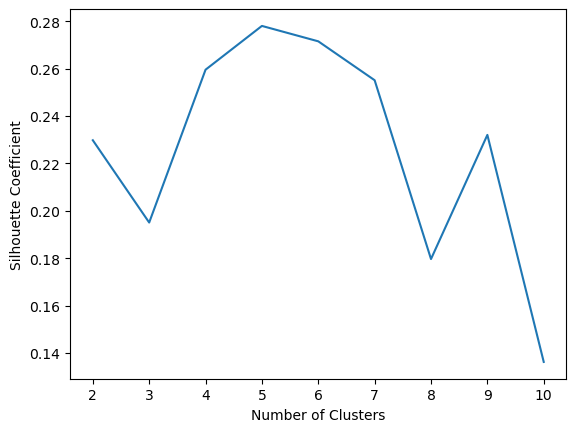

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

site_id_msba = clus_data.site_id.rename('site_id_msba')
df = clus_data.iloc[:, 1:]
features = clus_data.columns[1:]



scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.to_numpy())
scaled_features = pd.DataFrame(scaled_features, columns=features)

scaled_features.head()

wss = []
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(init="random",
                    n_clusters=k,
                    n_init=10,
                    max_iter=300,
                    random_state=1234
                   )
    
    kmeans.fit(scaled_features)
    wss.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)


plt.plot(range(2, 11), wss)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [28]:
kmeans = KMeans(init="random",
                    n_clusters=5,
                    n_init=10,
                    max_iter=300,
                    random_state=1234
                   )
    
kmeans.fit(scaled_features)

clust_df = pd.concat([site_id_msba, pd.Series(kmeans.labels_)], axis=1).rename(columns={0:'cluster'})
clust_df.to_csv('../Maverik_Capstone/data/clusters.csv')

C:\Users\pengo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [110]:
clust_df

,site_id_msba,cluster
0,21560,0
1,21980,1
2,22015,0
3,22085,3
4,22120,2
5,22260,2
6,22330,4
7,22400,0
8,22505,4
9,22540,0


In [111]:
merged_data_clust = merged_data.join(clust_df.set_index('site_id_msba'), on='site_id_msba' )
merged_data_clust

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,inside_sales,food_service,diesel_x,unleaded,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,cluster
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,4,Combo,HF/RV,No,Yes,1,1,2,2,0
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,4,Combo,HF/RV,No,Yes,1,1,2,2,0
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,4,Combo,HF/RV,No,Yes,1,1,2,2,0
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,4,Combo,HF/RV,No,Yes,1,1,2,2,0
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,4,Combo,HF/RV,No,Yes,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13537,2021-01-12,2021-12-28,52,Tuesday,NONE,WEEKDAY,2984.0300,864.2795,1609.7830,2492.5180,...,6,Stack,HF/RV,No,Yes,2,2,6,2,0
13538,2021-01-12,2022-01-01,1,Saturday,New Year's Day,WEEKEND,2483.4145,597.8315,731.2935,1564.0170,...,6,Stack,HF/RV,No,Yes,2,2,6,2,0
13539,2021-01-12,2022-01-04,1,Tuesday,NONE,WEEKDAY,3169.6875,970.4100,1851.6470,2767.5970,...,6,Stack,HF/RV,No,Yes,2,2,6,2,0
13540,2021-01-12,2022-01-07,2,Friday,NONE,WEEKDAY,3559.5805,1072.4175,2104.9070,2868.2325,...,6,Stack,HF/RV,No,Yes,2,2,6,2,0


In [112]:
clust = clust_df['cluster'].value_counts().to_frame()
clust['cluster'] = clust.index

([<matplotlib.axis.YTick at 0x1d064cfe090>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20')])

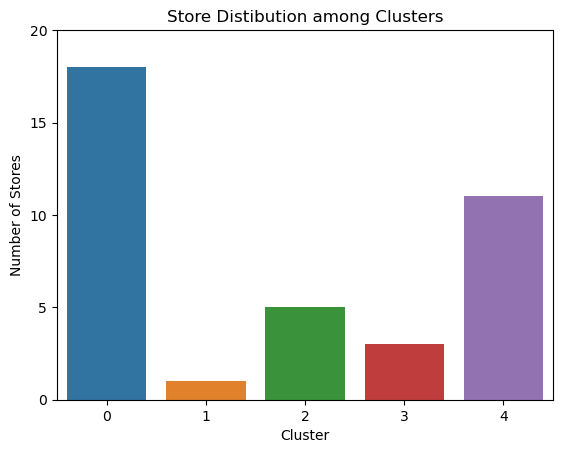

In [113]:
sns.barplot(data=clust,
            x='cluster',
            y=clust_df.cluster.value_counts(),
            order=[0,1,2,3,4])
plt.ylabel('Number of Stores')
plt.xlabel('Cluster')
plt.title('Store Distibution among Clusters')
plt.ylim(0,20)
plt.yticks([0,5,10,15,20])